<br>
<br>
<br>
<br>
<br>
<h1 style='text-align: center;
          font-family:courier;
          font-size:2em; 
          color:black;'> 
   Regresión logística binaria
</h1>
<br>
<h3 style='text-align:center; 
          font-family:courier;
          font-size:1.5em;
          color:black; '>
    Probabilidad 2 <br>
    Grupo: 9043 <br>
</h3>
<br>
<h4 style='text-align:left; 
          font-family:courier;
          font-size:1.5em;
          color:black; '>
    Por: Jorge Iván Reyes Hernández
</h4>
<br>
<br>
<br>

<h2 style='text-align:left; 
          font-family:serif;
          font-size:2em;
          color:black; '>
    Ejercicio
</h2>

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    En 1986, el transbordador espacial Challenger explotó durante el despegue, matando a los siete astronautas que iban a bordo. La explosión fue el resultado de un fallo en la junta tórica, la rotura de un anillo de goma que sella las partes de la nave. Se cree que el accidente fue causado por el clima inusualmente frío ($31 ^o$F o $0$ $^o$C) en el momento del lanzamiento, ya que hay razones para creer que las probabilidades de fallo de la junta tórica aumentan a medida que la temperatura disminuye <br>
    Los datos sobre los lanzamientos anteriores del transbordador espacial y los fallos de las juntas tóricas figuran en el conjunto de datos challenger proporcionado con el paquete mcsm. La primera columna corresponde a los indicadores de fallo $y_i$ y la segunda a la temperatura correspondiente $x_i$ $(1 ≤ i ≤ 24)$
</p>

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    1. Ajuste este conjunto de datos con una regresión logística, donde
    $$
        \mathbb{P}(Y_i=1 |x_i) = p(x_i) = \frac{\exp(\beta_0 + \beta_º x_i)}{1 + \exp(\beta_0 + \beta_1 x_i)}
    $$
    Deduce los estimadores máximo verosimiles para $\beta_0$ y $\beta_1$.
</p>

<h3 style='text-align:left; 
          font-family:serif;
          font-size:1.5em;
          color:black; '>
    Solución
</h3>

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    Sea $X = \{x_1, ..., x_n \} \subset \mathbb{R}$ el conjunto de datos e $y = \{y_1,...,y_n \}$ $\forall i \in \{1,...,n\}$ $y_i \in \{ 0,1\}$ el conjunto de varibles respuesta. <br>
    En nuestro problema 
    $$
    x_i : \text{temperatura} \\ 
    y_i : \text{indicador de fallo}
    $$
    Como las covariables $x_i$ son $1-\text{dimensional}$, el modelo propuesto es
    $$
    p_i = p_i (\vec \beta) = \mathbb{P}(y_i = 1 | x_i) = \frac{\exp(\beta_0 + \beta_1 x_i)}{1 + \exp(\beta_0 + \beta_1 x_i)}
    $$
    con $\vec \beta = (\beta_0, \beta_1) \in \mathbb{R}^2$ el vector de parámetros. <br>
    Como las variables respuesta son binarias, podemos considerarlas como ensayos Bernoulli:
    $$
    Y_i | X_i = x_i \sim \text{Bernoulli}(p_i)
    $$
    donde, por hipótesis, estamos considerando que la probabilidad de éxito de los ensayos es $p_i$, dada por el modelo de regresión logística. Entonces
    $$
    f_{Y|X}(Y_i | X_i = x_i) = p_i ^{y_i} (1-p_i)^{1-y_i}
    $$
    por lo que la función de verosimilitud es
    $$
    f_{Y|X}(Y_1 | X_1 = x_1,..., Y_n | X_n = x_n) = \prod _{i=1} ^n f_{Y|X}(Y_i | X_i = x_i) = \prod p_i ^{y_i} (1-p_i)^{1-y_i}
    $$
    $$\Rightarrow \mathcal{L} (\vec \beta) = \prod p_i ^{y_i} (1-p_i)^{1-y_i}$$
    El estimador máximo verosimil de $\vec \beta$ es
    $$
    \hat \beta _{ML} = \text{arg}\max _{\vec \beta \in \mathbb{R}^2} \mathcal{L} (\vec \beta)
    $$
    Para encontrar los valores usaremos el paquete statsmodels de Python
</p>

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    Cargamos las librerias a usar
</p>

In [2]:
from io import StringIO
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    Bajamos los datos de internet
</p>

In [3]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/challenger.csv'
s = requests.get(url).text

dataset = pd.read_csv(StringIO(s))
dataset

,o_ring_ct,distress_ct,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [4]:
# Preprocesamiento
dataset.replace(2, 1, inplace=True)
dataset['distress_ct'][20] = 1

dataset

,o_ring_ct,distress_ct,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,1
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    Una vez preprocesados, nos quedamos con los datos que nos interesan: temperatura e indicador de fallo
</p>

In [5]:
dataset['temperature']

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

In [6]:
dataset['distress_ct']

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    1
Name: distress_ct, dtype: int64

In [9]:
X = np.array(dataset['temperature']).reshape(-1,1)
y = np.array(dataset['distress_ct']).reshape(-1,)

In [10]:
X

array([[66],
       [70],
       [69],
       [68],
       [67],
       [72],
       [73],
       [70],
       [57],
       [63],
       [70],
       [78],
       [67],
       [53],
       [67],
       [75],
       [70],
       [81],
       [76],
       [79],
       [75],
       [76],
       [58]])

In [11]:
y

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1])

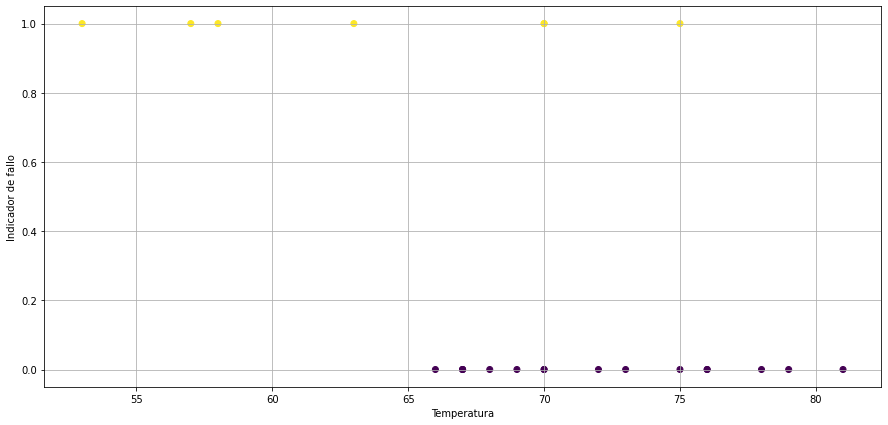

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(X, y, c=y)
plt.xlabel('Temperatura')
plt.ylabel('Indicador de fallo')
plt.grid(True);

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    Creamos el vector $X = [1, \text{Temperatura}]$ y ajustamos el modelo de regresión logística usando máxima verosimilitud
</p>

In [14]:
X = sm.add_constant(X)
X

array([[ 1., 66.],
       [ 1., 70.],
       [ 1., 69.],
       [ 1., 68.],
       [ 1., 67.],
       [ 1., 72.],
       [ 1., 73.],
       [ 1., 70.],
       [ 1., 57.],
       [ 1., 63.],
       [ 1., 70.],
       [ 1., 78.],
       [ 1., 67.],
       [ 1., 53.],
       [ 1., 67.],
       [ 1., 75.],
       [ 1., 70.],
       [ 1., 81.],
       [ 1., 76.],
       [ 1., 79.],
       [ 1., 75.],
       [ 1., 76.],
       [ 1., 58.]])

In [14]:
model = sm.Logit(y, X)
log_reg = model.fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.2813
Time:                        19:19:09   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0429      7.379      2.039      0.041       0.581      29.505
x1            -0.2322      0.108     -2.145      0.032      -0.444      -0.020
==============================================================================
"""

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    Podemos ver que los estimadores máximo verosimiles son:
    $$
    \hat \beta _{0 ML}= 15.0429 \\
    \hat \beta_{1ML} = - 0.2322
    $$
    A continuación se muestra la gráfica de la regresión
</p>

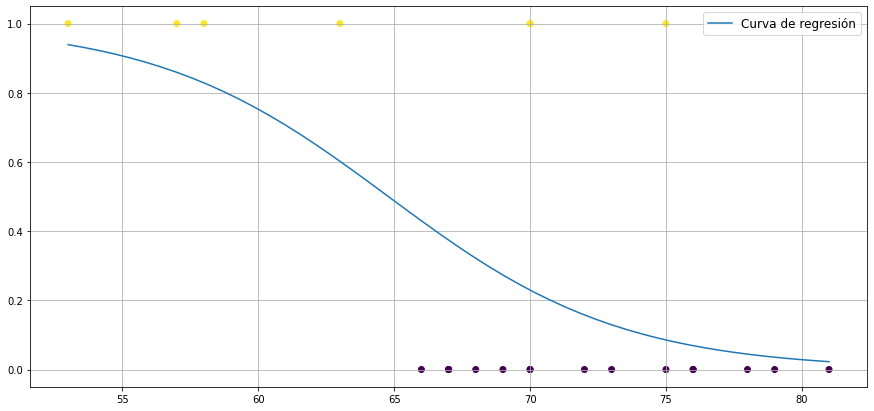

In [17]:
beta0_ML = 15.0429
beta1_ML = -0.2322

x_dom = np.linspace(min(X[:,1]), max(X[:,1]))
regresion = lambda beta0, beta1: np.exp(beta0 + beta1*x_dom) / (1 + np.exp(beta0 + beta1*x_dom))

plt.figure(figsize=(15,7))
plt.plot(x_dom, regresion(beta0_ML, beta1_ML), label='Curva de regresión')
plt.scatter(X[:,1], y, c=y)
plt.legend(prop={'size': 12})
plt.grid(True);

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
   4. Deduzca de esta muestra una estimación de la probabilidad de fallo a $60^o$, $50^o$ y $40^o$ F.
</p>

<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    Suponga que tenemos nuevos datos $X_{test} = \{ 40, 50, 60\}$. Queremos calcula la probabilidad de que a estas temperaturas, haya falla
    $$
    \mathbb{P}(Y=1|X_{test})
    $$
</p>

In [16]:
predictor = lambda x, beta0, beta1: np.exp(beta0 + beta1 * x) / (1 + np.exp(beta0 + beta1 * x))

X_test = np.array([60, 50, 40])

# Predicción usando los MLEs
y_pred_ML = predictor(X_test, beta0_ML, beta1_ML)

for i in range(len(X_test)):
    print(f'Temperatura:{X_test[i]}')
    print(f'Probabilidad de fallo (Máxima verosimilitud) {y_pred_ML[i]:.3f}')

Temperatura:60
Probabilidad de fallo (Máxima verosimilitud) 0.752
Temperatura:50
Probabilidad de fallo (Máxima verosimilitud) 0.969
Temperatura:40
Probabilidad de fallo (Máxima verosimilitud) 0.997


<p style='text-align:left; 
          font-family:serif;
          font-size:1.3em;
          color:black; '>
    Es decir
    $$
    \mathbb{P}(y = 1 | X = 40) = 0.997 \\
    \mathbb{P}(y = 1 | X = 50) = 0.969 \\
    \mathbb{P}(y = 1 | X = 60) = 0.752
    $$
    <br>
    Lo que confirma que la probabilidad de fallo aumenta conforme disminuye la temperatura.
</p>